
Layer Outputs (visualized):
Visualizing layer: input_layer, filters: 1


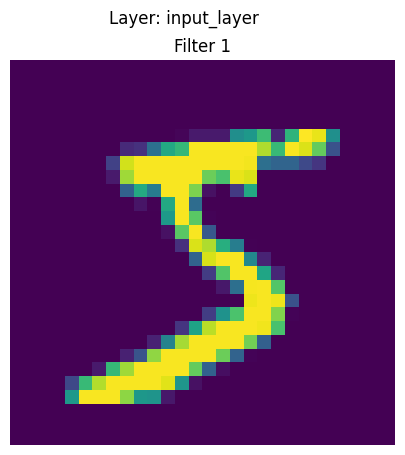

Visualizing layer: conv1, filters: 16


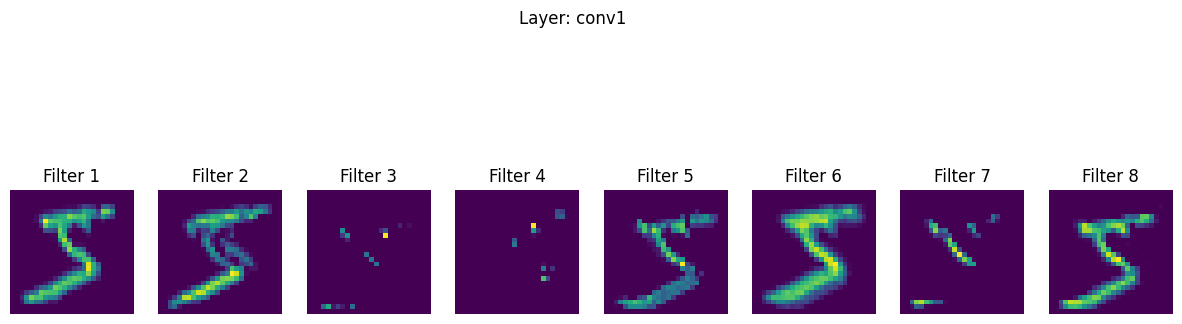

Visualizing layer: pool1, filters: 16


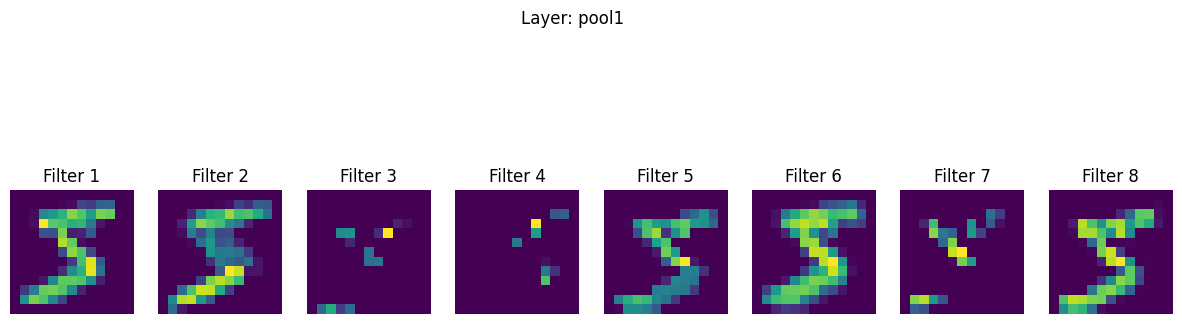

Visualizing layer: conv2, filters: 32


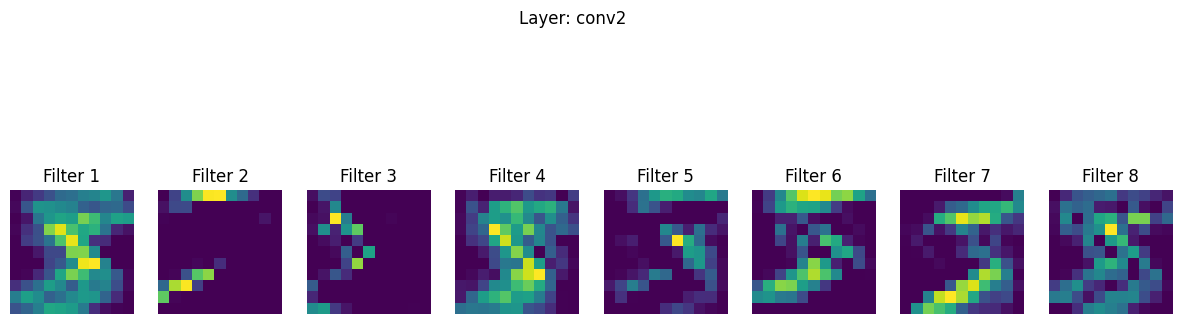

Visualizing layer: pool2, filters: 32


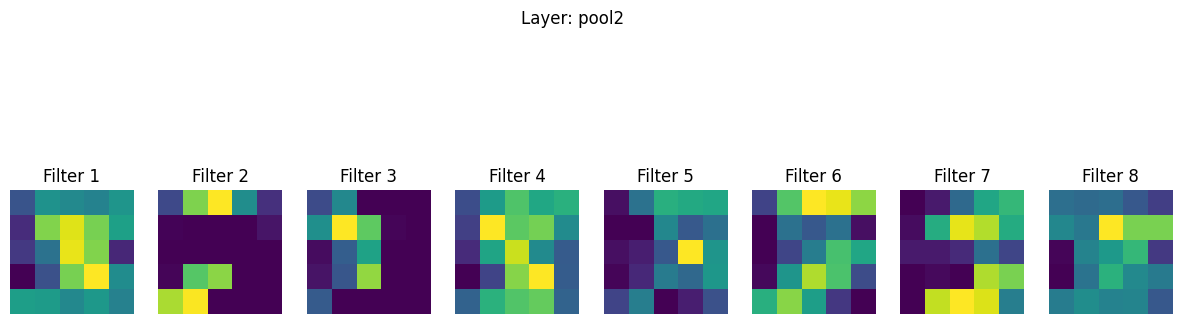

Layer: flatten, dense output shape: (1, 800)
Layer: dense1, dense output shape: (1, 64)
Layer: output, dense output shape: (1, 10)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8831 - loss: 0.3860
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0606
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0401
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0238
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9858 - loss: 0.0434

Test accuracy: 0.9886000156402588
Test loss: 0.03623975068330765


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Define the CNN model
inputs = tf.keras.Input(shape=(28, 28, 1), name="input_layer")
x = layers.Conv2D(16, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2), name='pool1')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2), name='pool2')(x)
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(64, activation='relu', name='dense1')(x)
outputs = layers.Dense(10, activation='softmax', name='output')(x)

model = models.Model(inputs=inputs, outputs=outputs, name="cnn_model")

# Step 4: Visualize the output of each layer
intermediate_model = models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
layer_outputs = intermediate_model(x_train[:1])  # Get outputs for the first sample

print("\nLayer Outputs (visualized):")
for i, (layer, output) in enumerate(zip(model.layers, layer_outputs)):
    if len(output.shape) == 4:  # Check if the output is an image (batch, height, width, channels)
        num_filters = output.shape[-1]
        print(f"Visualizing layer: {layer.name}, filters: {num_filters}")
        
        # Plot the feature maps for the first filter of this layer
        fig, axes = plt.subplots(1, min(8, num_filters), figsize=(15, 5))
        if min(8, num_filters) == 1:
            axes = [axes]  # Convert to a list if only one Axes object is created
        for j in range(min(8, num_filters)):  # Display up to 8 feature maps
            axes[j].imshow(output[0, :, :, j], cmap='viridis')  # Take the first sample's feature map
            axes[j].axis('off')
            axes[j].set_title(f"Filter {j+1}")
        plt.suptitle(f"Layer: {layer.name}")
        plt.show()
    elif len(output.shape) == 2:  # Fully connected layers (dense outputs)
        print(f"Layer: {layer.name}, dense output shape: {output.shape}")

# Step 5: Compile, train, and evaluate the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

In [7]:
# Step 6: Evaluate the model on the test set
test_loss, *test_accs = model.evaluate(x_test, [y_test] * 5)

# Print test accuracy and loss
print(f"Test loss: {test_loss}")
for i, acc in enumerate(test_accs):
    print(f"Test accuracy for output {i+1}: {acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_1_accuracy: 0.8341 - dense_2_accuracy: 0.8112 - dense_3_accuracy: 0.9146 - dense_4_accuracy: 0.9099 - loss: 3.6379 - output_accuracy: 0.9147
Test loss: 3.406498908996582
Test accuracy for output 1: 0.833299994468689
Test accuracy for output 2: 0.819100022315979
Test accuracy for output 3: 0.9258000254631042
Test accuracy for output 4: 0.9222999811172485
Test accuracy for output 5: 0.926800012588501
